## Smallest nonzero persistent eigenvalue of a filtration

First, create a filtration from synthetic data:

In [1]:
import gudhi as gd
import tadasets
sphere = tadasets.dsphere(n=300, d=1, r=2, noise=0.3, seed=42)
alpha = gd.AlphaComplex(points=sphere)
st = alpha.create_simplex_tree()
filtration = list(st.get_filtration())

Convert it to boundary data:

In [2]:
from persistent_laplacians.filtrations import simplices_by_dimension, compute_boundary_matrices, filtration_hash_map

unique_filtration_values = sorted(list(set([f for (_, f) in filtration])))
simplices_by_dim, simplices_by_dim_only_filt = simplices_by_dimension(filtration)
boundary_matrices = compute_boundary_matrices(simplices_by_dim)
boundary_maps_index_dict = filtration_hash_map(filtration, simplices_by_dim_only_filt)
subsampled_filtration_indices = [x for x in range(len(unique_filtration_values)) if x % 10 == 0]

In [3]:
boundary_matrices

{1: {'n_rows': 300,
  'n_cols': 881,
  'data': array([ 1., -1.,  1., ..., -1.,  1., -1.], shape=(1762,)),
  'rows': array([277, 187, 252, ...,  19, 170,  19], shape=(1762,)),
  'cols': array([  0,   0,   1, ..., 879, 880, 880], shape=(1762,))},
 2: {'n_rows': 881,
  'n_cols': 582,
  'data': array([ 1., -1.,  1., ...,  1., -1.,  1.], shape=(1746,)),
  'rows': array([  8,   3,  10, ..., 802, 880, 858], shape=(1746,)),
  'cols': array([  0,   0,   0, ..., 581, 581, 581], shape=(1746,))}}

## Compute the smallest persistent eigenvalue

In [4]:
from persistent_laplacians import persistent_laplacians as pl
result = pl.smallest_eigenvalue(
    boundary_matrices,
    boundary_maps_index_dict,
    subsampled_filtration_indices,
    use_scipy=True
)

Matrix is zero, skipping eigenvalue calculation
Matrix is zero, skipping eigenvalue calculation
Matrix is zero, skipping eigenvalue calculation
Matrix is zero, skipping eigenvalue calculation
Matrix is zero, skipping eigenvalue calculation
Matrix is zero, skipping eigenvalue calculation
Matrix is zero, skipping eigenvalue calculation
Matrix is zero, skipping eigenvalue calculation
Matrix is zero, skipping eigenvalue calculation
Matrix is zero, skipping eigenvalue calculation
Matrix is zero, skipping eigenvalue calculation
Matrix is zero, skipping eigenvalue calculation
Matrix is zero, skipping eigenvalue calculation
Matrix is zero, skipping eigenvalue calculation
Matrix is zero, skipping eigenvalue calculation
Matrix is zero, skipping eigenvalue calculation
Matrix is zero, skipping eigenvalue calculation
Matrix is zero, skipping eigenvalue calculation
Matrix is zero, skipping eigenvalue calculation
Matrix is zero, skipping eigenvalue calculation
Matrix is zero, skipping eigenvalue calc

/var/folders/vw/75ns4gcj2pqgdh10pz8jrhjw0000gn/T/ipykernel_61561/2065417849.py:2: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  result = pl.smallest_eigenvalue(


## Plot nonpersistent eigenvalues (dim 1)

[0.0014648844270438214, 0.0014709346233519514, 0.0014942948328054066, 0.001553323359217265, 0.0015587520192277117, 0.0016825615807030821, 0.0019490993986097359, 0.0019825287541684776, 0.0019858007397914592, 0.0020365341745469602]


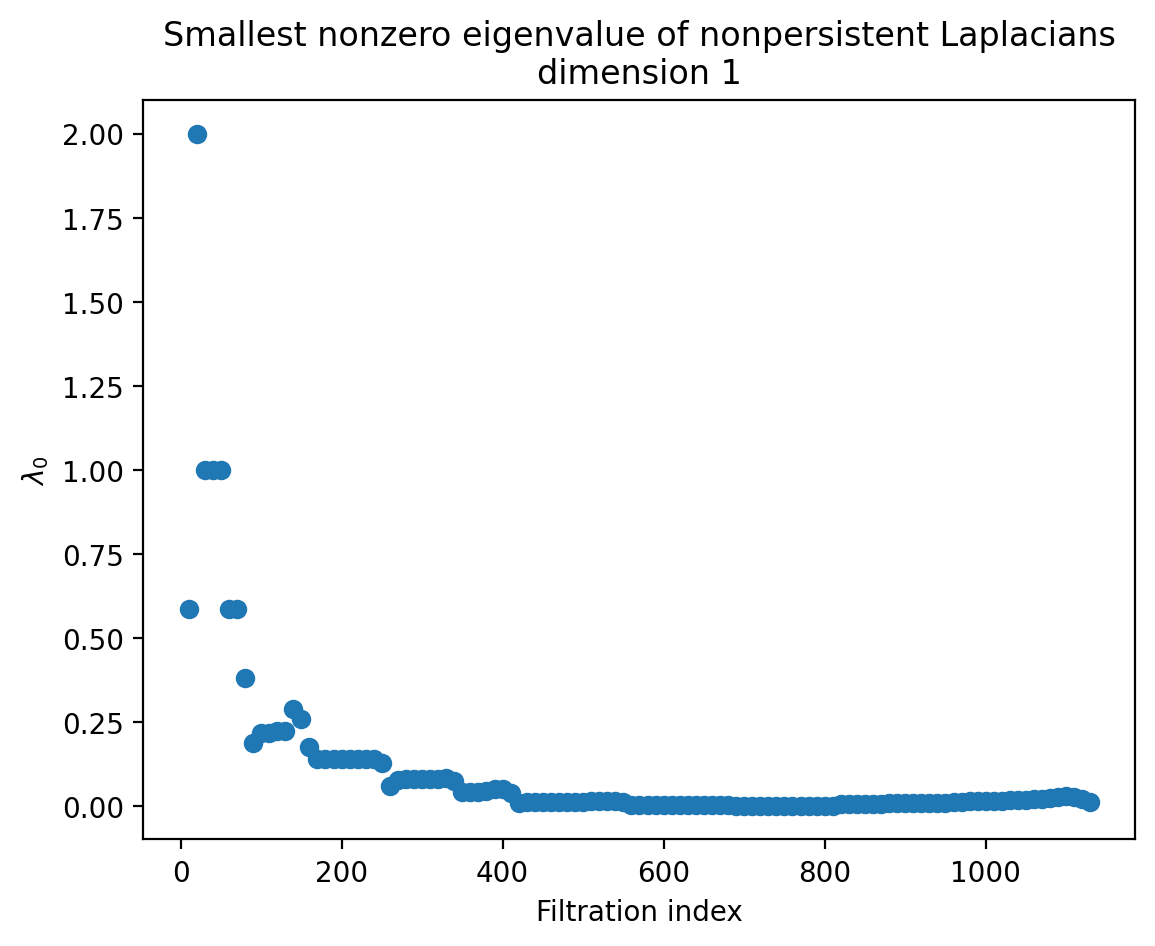

In [5]:
import matplotlib.pyplot as plt
nonpersistent = {k[0]: v[0] for (k, v) in result[1].items() if k[0] == k[1] and len(v) >= 1}
plt.figure(dpi=200)
plt.scatter(nonpersistent.keys(), nonpersistent.values())
plt.title(r"Smallest nonzero eigenvalue of nonpersistent Laplacians" + "\n" + "dimension 1")
plt.xlabel("Filtration index")
plt.ylabel(r"$\lambda_0$")

eigenvalues = sorted(nonpersistent.values())

print(eigenvalues[0:10])

## Persistent smallest nonzero eigenvalues

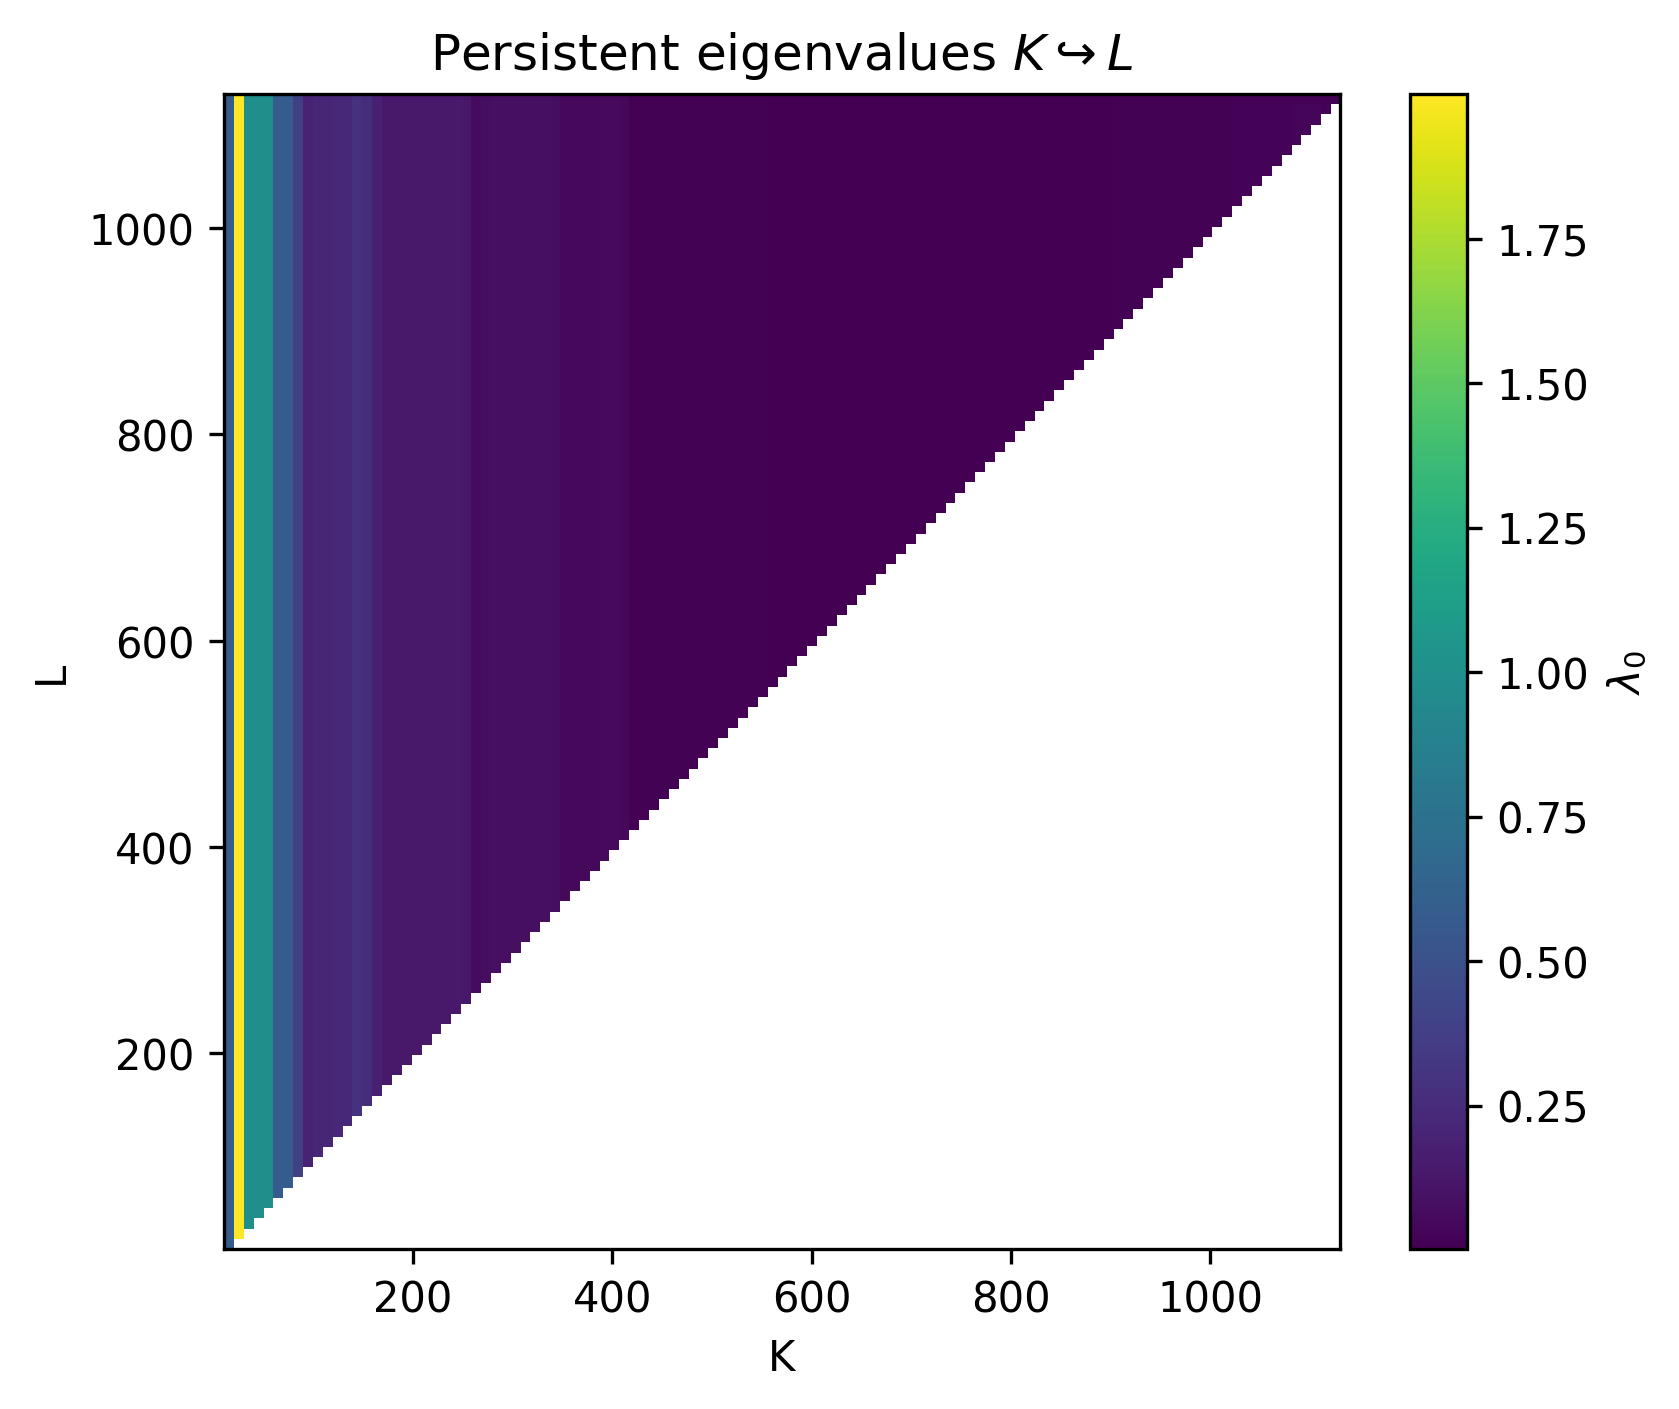

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Raw data
pts = {k: v for (k, v) in result[1].items() if len(v) >= 1}

# 1) Build sorted unique axes
xs = sorted({x for x, y in pts})
ys = sorted({y for x, y in pts})

# 2) Create matrix of NaNs
heat = np.full((len(ys), len(xs)), np.nan)

# 3) Fill matrix: row = y-index, col = x-index
x_i = {x:i for i,x in enumerate(xs)}
y_i = {y:i for i,y in enumerate(ys)}
for (x,y), v in pts.items():
    heat[y_i[y], x_i[x]] = v[0]

# 4) Plot as heatmap (no interpolation)
plt.figure(figsize=(6,5), dpi=300)
plt.imshow(
    heat,
    origin='lower',
    extent=(min(xs), max(xs), min(ys), max(ys)),
    aspect='auto'
)
plt.colorbar(label=r'$\lambda_0$')
plt.xlabel('K')
plt.ylabel('L')
plt.title(r'Persistent eigenvalues $K \hookrightarrow L$')
plt.show()

### When is the up persistent value getting used?

In [12]:
# Find all y for which (y,y) exists
pts = result[1]
diagonal = {y: pts[(y,y)] for (y1,y2) in pts if y1==y2}
# Compare
for (x,y), v in pts.items():
    if x!=y and (x,x) in pts and (abs(v[0] - pts[(x,x)][0]) > 1e-6):
        print(f"At y={y}, x={x}: {v} ≠ diagonal {pts[(x,x)]}")

At y=1130, x=1120: [0.016450008640129056] ≠ diagonal [0.022375970943473385]
At y=1130, x=1090: [0.024807421743704407] ≠ diagonal [0.027038383217496197]
At y=1130, x=1110: [0.020073540081026468] ≠ diagonal [0.02630338783607231]
At y=1130, x=1100: [0.022071216891524283] ≠ diagonal [0.031065808220506978]


<Axes: title={'center': 'Persistence barcode'}>

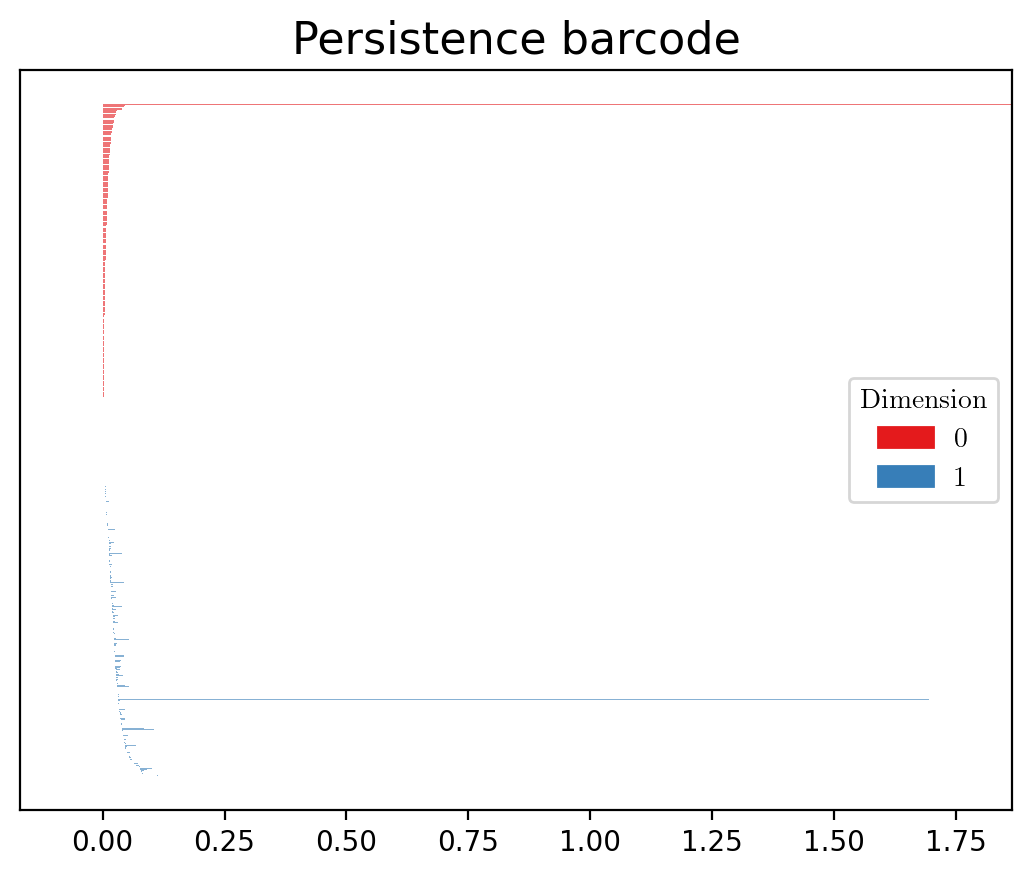

In [8]:
diag = st.persistence()
fig, ax = plt.subplots(dpi=200)
gd.plot_persistence_barcode(diag, axes=ax)